In [1]:
import numpy as np
import pandas as pd
import statistics as stat
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
covid = pd.read_csv('C:/Users/vyabo/OneDrive/covid/covid-cases-masks.xlsb.csv')

In [3]:
covid.head()

,Unnamed: 0,fp,county,state,never,rarely,sometimes,frequently,always,county.cases,county.deaths,pop
0,111,1001,Autauga,Alabama,0.053,0.074,0.134,0.295,0.444,2893,42,NaN
1,120,1003,Baldwin,Alabama,0.083,0.059,0.098,0.323,0.436,9341,137,NaN
2,132,1005,Barbour,Alabama,0.067,0.121,0.120,0.201,0.491,1214,29,NaN
3,202,1007,Bibb,Alabama,0.020,0.034,0.096,0.278,0.572,1252,38,NaN
4,222,1009,Blount,Alabama,0.053,0.114,0.180,0.194,0.459,3158,45,NaN


In [4]:
rate = pd.read_csv('C:/Users/vyabo/OneDrive/covid/united_states_covid19_cases_and_deaths_by_state.csv')

In [5]:
rate.head()

,Unnamed: 0,State.Territory,Total.Cases,Confirmed.Cases,Probable.Cases,Cases.in.Last.7.Days,Case.Rate.per.100000,Total.Deaths,Confirmed.Deaths,Probable.Deaths,Deaths.in.Last.7.Days,Death.Rate.per.100000,Case.Rate.per.100000.in.Last.7.Days,Death.Rate.per.100K.in.Last.7.Days
0,2,Alabama,260359,215938.0,44421.0,18402,5327,3776,3375.0,401.0,204,77,53.8,0.6
1,1,Alaska,33291,NaN,NaN,4399,4514,129,NaN,NaN,11,17,85.2,0.2
2,4,Arizona,346421,335248.0,11173.0,32095,4830,6821,6310.0,511.0,253,95,63.9,0.5
3,3,Arkansas,164310,NaN,NaN,11685,5452,2555,NaN,NaN,119,84,55.4,0.6
4,5,California,1264539,NaN,NaN,105850,3197,19437,NaN,NaN,458,49,38.2,0.2


In [11]:
rate2 = rate[['State.Territory','Case.Rate.per.100000']]

In [12]:
rate2.head()

,State.Territory,Case.Rate.per.100000
0,Alabama,5327
1,Alaska,4514
2,Arizona,4830
3,Arkansas,5452
4,California,3197


In [14]:
covid.groupby(['state'],as_index=False).head()

,Unnamed: 0,fp,county,state,never,rarely,sometimes,frequently,always,county.cases,county.deaths,pop
0,111,1001,Autauga,Alabama,0.053,0.074,0.134,0.295,0.444,2893,42,NaN
1,120,1003,Baldwin,Alabama,0.083,0.059,0.098,0.323,0.436,9341,137,NaN
2,132,1005,Barbour,Alabama,0.067,0.121,0.120,0.201,0.491,1214,29,NaN
3,202,1007,Bibb,Alabama,0.020,0.034,0.096,0.278,0.572,1252,38,NaN
4,222,1009,Blount,Alabama,0.053,0.114,0.180,0.194,0.459,3158,45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3108,29,56001,Albany,Wyoming,0.136,0.100,0.151,0.181,0.432,3152,9,NaN
3109,206,56003,Big Horn,Wyoming,0.182,0.187,0.120,0.257,0.253,536,13,NaN
3110,376,56005,Campbell,Wyoming,0.216,0.164,0.131,0.201,0.289,3171,17,NaN
3111,386,56007,Carbon,Wyoming,0.044,0.137,0.087,0.278,0.454,739,9,NaN


In [15]:
mask1 = covid.groupby(['state']).agg(
    never=('never', 'mean'),
    rarely=('rarely','mean'),
    sometimes=('sometimes','mean'),
    frequently=('frequently','mean'),
    always=('always','mean')
)

In [16]:
mask1.head()

,never,rarely,sometimes,frequently,always
state,,,,,
Alabama,0.081567,0.081090,0.146612,0.215343,0.475313
Alaska,0.056400,0.067440,0.089360,0.328880,0.457720
Arizona,0.053133,0.051400,0.099800,0.180733,0.614733
Arkansas,0.089107,0.086427,0.135787,0.218973,0.469733
California,0.034224,0.032586,0.067293,0.160431,0.705466


In [19]:
rate2 = rate2.sort_values('State.Territory')

In [20]:
mask1 = mask1.reset_index()
rate2 = rate2.reset_index()

In [22]:
masks = pd.concat([mask1[['never','rarely','sometimes','frequently','always']],rate2[['Case.Rate.per.100000']]],axis=1)

In [23]:
masks.head()

,never,rarely,sometimes,frequently,always,Case.Rate.per.100000
0,0.081567,0.081090,0.146612,0.215343,0.475313,5327
1,0.056400,0.067440,0.089360,0.328880,0.457720,4514
2,0.053133,0.051400,0.099800,0.180733,0.614733,4830
3,0.089107,0.086427,0.135787,0.218973,0.469733,5452
4,0.034224,0.032586,0.067293,0.160431,0.705466,3197


In [24]:
masks[masks['never']+masks['rarely'] > 0.2].describe().iloc[1,5]

6721.916666666667

In [25]:
masks[masks['frequently']+masks['always'] > 0.8].describe().iloc[1,5]

3769.125

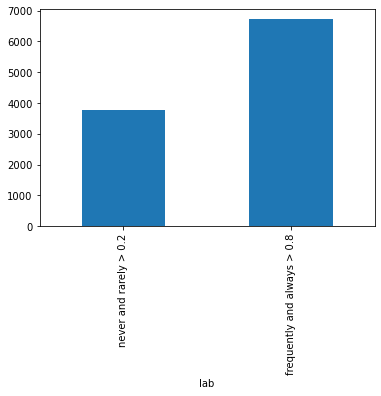

In [26]:
pd.DataFrame({'lab':['never and rarely > 0.2','frequently and always > 0.8'], 'val':[3769.125, 6721.916666666667]}).plot.bar(x='lab',legend=False)

In [27]:
model = LinearRegression()

In [28]:
y = np.array(masks['Case.Rate.per.100000'])

In [29]:
y2 = np.array(masks[(masks['Case.Rate.per.100000'] != 4514) & (masks['Case.Rate.per.100000'] != 3155)]['Case.Rate.per.100000'])

In [30]:
x = np.array(masks['never']).reshape(-1,1)

In [31]:
model.fit(x,y)

LinearRegression()

In [32]:
pred1 = model.predict(x)

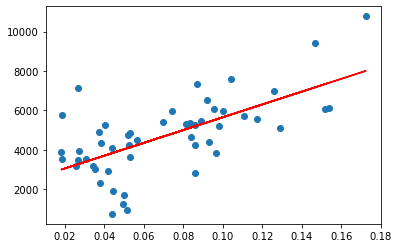

In [33]:
plt.scatter(x,y)
plt.plot(x,pred1,color='red')

In [34]:
x2 = np.array(masks['rarely']).reshape(-1,1)

In [35]:
model.fit(x2,y)

LinearRegression()

In [36]:
pred2 = model.predict(x2)

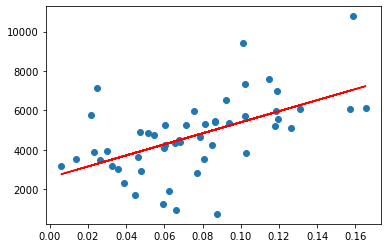

In [37]:
plt.scatter(x2,y)
plt.plot(x2,pred2,color='red')

In [38]:
x3 = np.array(masks['sometimes']).reshape(-1,1)

In [39]:
model.fit(x3,y)

LinearRegression()

In [40]:
pred3 = model.predict(x3)

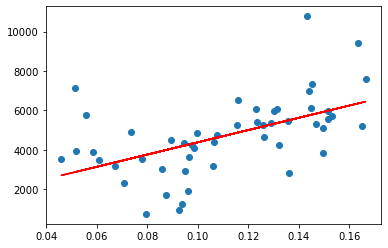

In [41]:
plt.scatter(x3,y)
plt.plot(x3,pred3,color='red')

In [42]:
masks[(masks['frequently'] > 0.1) & (masks['frequently'] < 0.32)]

,never,rarely,sometimes,frequently,always,Case.Rate.per.100000
0,0.081567,0.081090,0.146612,0.215343,0.475313,5327
2,0.053133,0.051400,0.099800,0.180733,0.614733,4830
3,0.089107,0.086427,0.135787,0.218973,0.469733,5452
4,0.034224,0.032586,0.067293,0.160431,0.705466,3197
5,0.038238,0.065302,0.094714,0.240810,0.561048,4340
6,0.030750,0.080500,0.077875,0.171750,0.638875,3532
7,0.018333,0.023333,0.058333,0.142000,0.758333,3873
9,0.052000,0.054388,0.107642,0.190164,0.595791,4754
10,0.083799,0.078585,0.126069,0.200384,0.511126,4639
11,0.049500,0.059000,0.093750,0.176250,0.621500,1264


In [43]:
x4 = np.array(masks[(masks['frequently'] > 0.1) & (masks['frequently'] < 0.32)]['frequently']).reshape(-1,1)

In [44]:
model.fit(x4,y2)

LinearRegression()

In [45]:
pred4 = model.predict(x4)

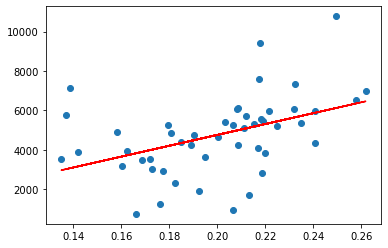

In [46]:
plt.scatter(x4,y2)
plt.plot(x4,pred4,color='red')

In [47]:
x5 = np.array(masks['always']).reshape(-1,1)

In [48]:
model.fit(x5,y)

LinearRegression()

In [49]:
pred5 = model.predict(x5)

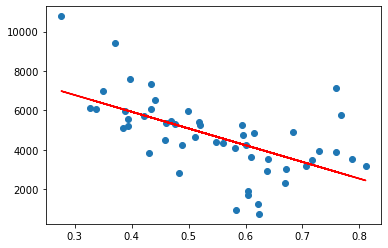

In [50]:
plt.scatter(x5,y)
plt.plot(x5,pred5,color='red')